In [151]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np

sys.path.append(os.path.abspath('../../Cochlear_Implant_Hackathon/'))

from software.models.minimal_model import basic_model
from software.fitness_functions.delta_wav import compute_wavfile_delta
# Import the rest of the GpyT subpackage functions for the demo here

from software.AB_imports.Demo.proceduralDemo import demo4_procedural
from scipy.fftpack import fft,rfft,irfft,ifft
from sklearn.preprocessing import StandardScaler
import pyaudio as pa
from scipy.signal import resample
from scipy.io.wavfile import read as wavread
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    plt.style.use('rossidata')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading Original Demo


In [148]:
input_file_path=os.path.abspath('../sample_data/sentence1_55_clean.wav')

results  = demo4_procedural(input_file_path)

/Users/nicholas.rossi/Documents/Personal/Cochlear_Implant_Hackathon/software/AB_imports/Filterbank/hilbertEnvelope.py:73: RuntimeWarning: divide by zero encountered in log2
  env[i,:] = np.log2(env[i,:]);
/Users/nicholas.rossi/Documents/Personal/Cochlear_Implant_Hackathon/software/AB_imports/NoiseReduction/noiseReduction.py:76: RuntimeWarning: divide by zero encountered in log10
  logA = np.maximum(-100,20*np.log10(A))
/Users/nicholas.rossi/Documents/Personal/Cochlear_Implant_Hackathon/software/AB_imports/Validation/validateOutput.py:81: UserWarning: No Validation file found! Validation process will be skipped, results may not be accepted for final entry submission!!
  warnings.warn('No Validation file found! Validation process will be skipped, results may not be accepted for final entry submission!!')


# demo performance
This is the original transformation model, this is meant for benchmarking

In [134]:
wavIn = wavread(results['sourceName'])
wavData = wavIn[1]/(2**15-1)
wavFs = wavIn[0]

wavResampled = resample(wavData,((results['audioFs']/wavFs)*wavData.shape[0]).astype(int))
input1 = np.float32(np.concatenate((wavResampled,np.zeros(results['audioFs']))))

output1 = np.float32(np.concatenate((np.zeros(results['audioFs']),results['audioOut'])))
p = pa.PyAudio()
devInfo = p.get_default_output_device_info()
devIndex = devInfo['index']
nChan = 1

stream = p.open(format=pa.paFloat32,
channels=nChan,
rate=results['audioFs'],
output=True,
output_device_index = devIndex
)

inData = input1.astype(np.float32).tobytes()
outData1 = output1.astype(np.float32).tobytes()


stream.write(outData1)


stream.write(inData)
stream.close()


In [149]:
demo_score=compute_wavfile_delta(wavIn[1],wavIn[0],results['audioOut'],results['audioFs'])
print(f'Demo Score : {demo_score}')

Demo Score : 1.464025855064392


# Minimal model performance
This is the performance of the minimal model, it's doing the absolute basics to return a rational answer

In [143]:
results=basic_model(input_file_path)

In [125]:
# Testing Audio Files

In [132]:
wavIn = wavread(results['sourceName'])
wavData = wavIn[1]/(2**15-1)
wavFs = wavIn[0]

wavResampled = resample(wavData,((results['audioFs']/wavFs)*wavData.shape[0]).astype(int))
input1 = np.float32(np.concatenate((wavResampled,np.zeros(results['audioFs']))))

output1 = np.float32(np.concatenate((np.zeros(results['audioFs']),results['audioOut'])))
p = pa.PyAudio()
devInfo = p.get_default_output_device_info()
devIndex = devInfo['index']
nChan = 1

stream = p.open(format=pa.paFloat32,
channels=nChan,
rate=results['audioFs'],
output=True,
output_device_index = devIndex
)

inData = input1.astype(np.float32).tobytes()
outData1 = output1.astype(np.float32).tobytes()


stream.write(outData1)


stream.write(inData)
stream.close()

In [147]:
minimal_model_score=compute_wavfile_delta(wavIn[1],wavIn[0],results['audioOut'],results['audioFs'])
print(f'Minimal model Score : {minimal_model_score} ')



Minimal model Score : 1.0696932077407837 


In [158]:
perfect_score=compute_wavfile_delta(wavIn[1],wavIn[0],wavIn[1],wavIn[0])

Text(0.5, 1.0, 'Scores \n (higher = better)')

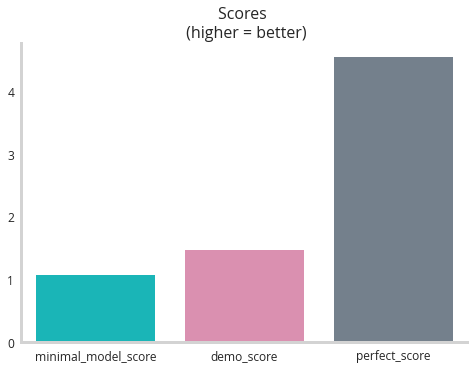

In [162]:
fig,ax=plt.subplots()
data=pd.DataFrame({'minimal_model_score':minimal_model_score,
'demo_score':demo_score,'perfect_score':perfect_score},index=[0])

sns.barplot(data=data,ax=ax)
ax.set_title('Scores \n (higher = better)')

In [163]:
perfect_score

4.548638343811035